In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:25
🔁 Restarting kernel...


In [ ]:
!mamba install -c conda-forge rdkit 

In [ ]:
!conda install -c districtdatalabs yellowbrick

In [ ]:
!pip3 install matplotlib==3.1.3

In [ ]:
################################imports ######################################""

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
#import emoji
%matplotlib inline 

#importing rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#from utility import FeatureGenerator
from rdkit.Chem import PandasTools as PandasTools
from rdkit import DataStructs
from rdkit.Chem.Subshape import SubshapeBuilder,SubshapeAligner,SubshapeObjects

#importing sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [ ]:
#########################################################import curated data #############################" chemical structures and activities "

In [4]:
from numpy.core.numeric import NaN

#data_t=pd.read_csv("/content/QSR_ready.csv",delimiter="\t",decimal='.', usecols=('ID','Smiles_canonical', 'IC50_x','EC50_x', 'EC90_x', 'CC50_x')) #usecols=('ID','Smiles_canonical','IC50_x','EC50_x','EC90_x','CC50_x','Toxicity'),na_values={'NaN'})##data to train
data_t=pd.read_csv("/content/QSR_ctg_ok.csv",delimiter=",",decimal='.')#, usecols=('ID','Smiles_canonical', 'IC50_x','EC50_x', 'EC90_x', 'CC50_x')) #usecols=('ID','Smiles_canonical','IC50_x','EC50_x','EC90_x','CC50_x','Toxicity'),na_values={'NaN'})##data to train
data_p=pd.read_csv("/content/RF_acc08.csv",delimiter=";",decimal='.', usecols=range(1,3),na_values={'NaN'})##new data to predict 
#cov=pd.read_csv("/content/cov_netRécupération-automatique.csv", delimiter="\t",decimal=".", na_values={'NaN','  '},usecols=('ID','smiles_canonical', 'Relevance_score'))
#data=pd.read_csv("/content/dftocsv(1).csv",delimiter=";",decimal='.',na_values={'NaN'})##new data to predict 
data_t.head(2)

,ID,Smiles_canonical,IC50_x,EC50_x,EC90_x,CC50_x,Relevance_score,Activity_IC50,Activity_EC50,Activity_EC90,Activity,Toxicity
0,CID197020N4Hydroxycytidine,O=c1nc(NO)ccn1C1OC(CO)C(O)C1O,0.08,0.3,40.0,NaN,NaN,Active,Active,Inactive,NaN,NaN
1,CID3164070WalrycinB,Cn1nc(-c2ccc(C(F)(F)F)cc2)nc2c(=O)n(C)c(=O)nc1-2,0.26,NaN,NaN,NaN,NaN,Active,NaN,NaN,NaN,NaN


In [ ]:
data_t.describe()

In [5]:
data_p.head(2)

,ID,Smiles_canonical
0,CID101616642_Gallicin,CC1C2CCC(=C)C(CCC(=CC2OC1=O)C)O
1,CID10207_Aloeimodin,C1=CC2=C(C(=C1)O)C(=O)C3=C(C2=O)C=C(C=C3O)CO


In [ ]:
######################################################################   cov database preparation #############################""

In [ ]:
#reassignement  of the class threshold yo can play arround with them to strenthen or loosen the model 
#df3=data_t_new.copy()
#df3['Activity_deep']=pd.cut(df3['Deep_learning_cov_score'],bins=[0,0.5,2],labels=['Inactive','Active'])
#df3['Activity_IC50']=pd.cut(df3['IC50_x'],bins=[0,5,114],labels=['Active','Inactive'])
#df3['Activity_EC50']=pd.cut(df3['EC50_x'],bins=[0,5,114],labels=['Active','Inactive'])#cahnged from5
#df3['Activity_EC90']=pd.cut(df3['EC90_x'],bins=[0,20,114],labels=['Active','Inactive'])
#df3['Activity']=pd.cut(df3['Relevance_score'],bins=[0,20,63],labels=['Inactive','Active'])##relevance score >20 is active
#df3['Toxicity']=pd.cut(df3['CC50_x'],bins=[0,20,400],labels=['Toxic','not_toxic'])
                                                  # 'Very_strong','Strong','Active','Weak'])


In [7]:
############################################################################______________reclasse teh data to make it more balanced 
data_t['Activity']=pd.cut(data_t['Relevance_score'],bins=[0,2,63],labels=['Inactive','Active'])##relevance score >20  inactive >>> active # if 2 active = inactive
data_t["Activity_IC50"].fillna(data_t["Activity"], inplace=True)

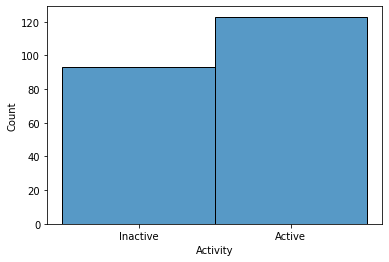

In [8]:
#g = sns.FacetGrid(tips, col="time")
#g.map(sns.histplot, "tip")
sns.histplot(data_t.Activity)

In [9]:
#missing values
data_t.isnull().sum(axis=0)/data_t.shape[0]*100# trget variable  Activity_IC50 no missings ready to go

ID                   0.000000
Smiles_canonical     0.000000
IC50_x              88.541667
EC50_x              83.333333
EC90_x              88.541667
CC50_x              96.527778
Relevance_score     25.000000
Activity_IC50        0.000000
Activity_EC50       83.333333
Activity_EC90       88.541667
Activity            25.000000
Toxicity            96.527778
dtype: float64

In [ ]:
#####################################################_____________________Machine learning _________________________

In [ ]:
##data transformation and visualization 

In [12]:
m = data_t.ID[data_t.ID.str.contains(pat = 'CID5281040 ')] #pfizer reference molecule maping
#Mnuplavir= [col for col in data.columns if ('CID6440352Rupintrivir') in col]5281040 #CID1549000
m

Series([], Name: ID, dtype: object)

In [13]:
data_t.head(8)

,ID,Smiles_canonical,IC50_x,EC50_x,EC90_x,CC50_x,Relevance_score,Activity_IC50,Activity_EC50,Activity_EC90,Activity,Toxicity
0,CID197020N4Hydroxycytidine,O=c1nc(NO)ccn1C1OC(CO)C(O)C1O,0.080,0.3,40.0,NaN,NaN,Active,Active,Inactive,NaN,NaN
1,CID3164070WalrycinB,Cn1nc(-c2ccc(C(F)(F)F)cc2)nc2c(=O)n(C)c(=O)nc1-2,0.260,NaN,NaN,NaN,NaN,Active,NaN,NaN,NaN,NaN
2,CID11285588Danoprevir,CC(C)(C)OC(=O)NC1CCCCCC=CC2CC2(C(=O)NS(=O)(=O)...,0.290,NaN,NaN,NaN,NaN,Active,NaN,NaN,NaN,NaN
3,CID49849508Asenapine_hydrochloride,CN1CC2c3ccccc3Oc3ccc(Cl)cc3C2C1.Cl,0.340,NaN,NaN,NaN,NaN,Active,NaN,NaN,NaN,NaN
4,CID10219Emetine,CCC1CN2CCc3cc(OC)c(OC)cc3C2CC1CC1NCCc2cc(OC)c(...,0.500,NaN,NaN,NaN,NaN,Active,NaN,NaN,NaN,NaN
5,CID24199313Auranofin,CC(=O)OCC1OC([S-])C(OC(C)=O)C(OC(C)=O)C1OC(C)=...,0.510,NaN,NaN,NaN,NaN,Active,NaN,NaN,NaN,NaN
6,CID2165Amodiaquine,CCN(CC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O,1.274,NaN,NaN,NaN,NaN,Active,NaN,NaN,NaN,NaN
7,CID6440352Rupintrivir,CCOC(=O)C=CC(CC1CCNC1=O)NC(=O)C(CC(=O)C(NC(=O)...,1.870,50.0,NaN,NaN,NaN,Active,Inactive,NaN,NaN,NaN


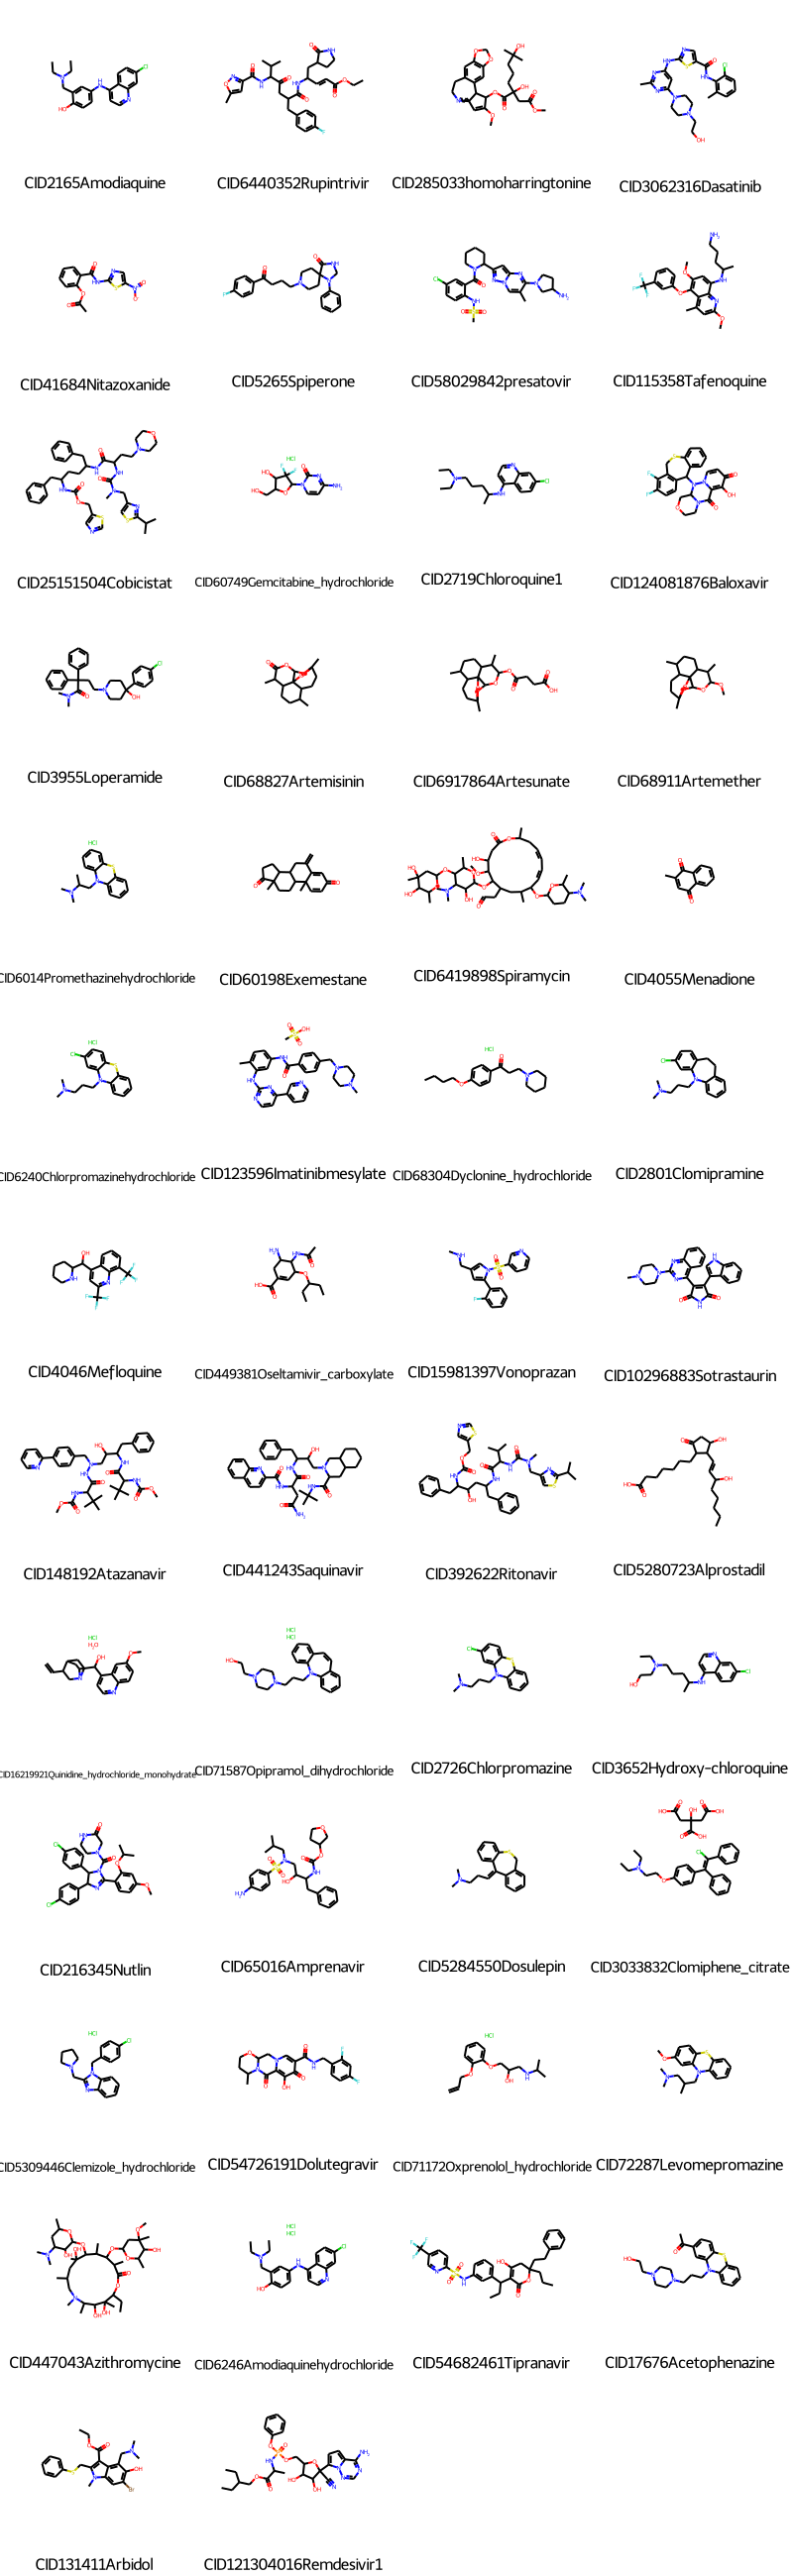

In [14]:
#Convert SMILES to 2D molecules:
molecules = data_t.Smiles_canonical.apply(Chem.MolFromSmiles)
#Display some of the moecules
Draw.MolsToGridImage(molecules[6:56],molsPerRow=4,legends=[x for x in data_t.ID[6:56]]) #
#Draw.MolsToGridImage(molecules[100:-1],molsPerRow=4,legends=[x for x in data_t.ID[100:-1]]) #legends=[x.GetProp("_Name") for x in ms[:8]])

In [ ]:
#######################################    chimical space smilarity #############################################

Tanimoto Similarity Coefficient of reference molecule vs refrence molecule: 1.0
Tanimoto Similarity Coefficient of reference molecule vs ramdesivir: 0.08620689655172414
Tanimoto Similarity Coefficient shows a very divers chemical space with weak TSimilarity


Text(0.5, 1.0, 'Pairwise similarity all molecules')

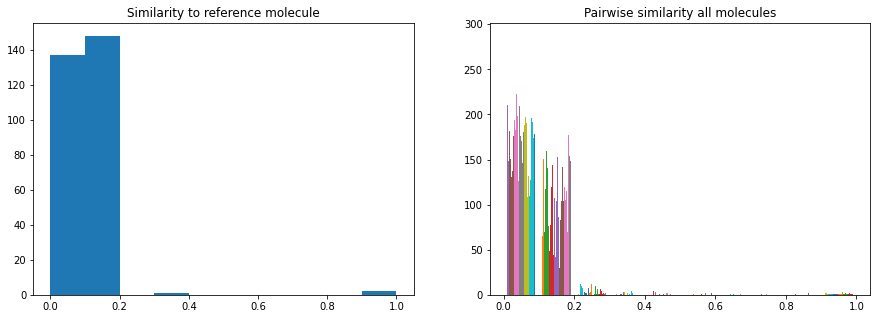

In [ ]:
## Similarity Calculations

# We calculate Morgan fingerprints 
mols_fps=[AllChem.GetMorganFingerprintAsBitVect(x,2) for x in molecules]
print(f'Tanimoto Similarity Coefficient of reference molecule vs refrence molecule: {DataStructs.TanimotoSimilarity(mols_fps[55],mols_fps[55])}')
print(f'Tanimoto Similarity Coefficient of reference molecule vs ramdesivir: {DataStructs.TanimotoSimilarity(mols_fps[55],mols_fps[6])}')
print(f'Tanimoto Similarity Coefficient shows a very divers chemical space with weak TSimilarity')

# Calculate similarities to reference molecule
sim_ref = DataStructs.BulkTanimotoSimilarity(mols_fps[55],mols_fps)###reference molecules


# Calculate pairwise similarities
def pairwise_sim(mols):
    pairwise=[]
    for i in mols:
        sim = DataStructs.BulkTanimotoSimilarity(i,mols)
        pairwise.append(sim)
    return pairwise

PW = pairwise_sim(mols_fps)
figure,(plt1,plt2) = plt.subplots(1,2)
figure.set_size_inches(15,5)
plt1.hist(sim_ref)
plt1.set_title('Similarity to reference molecule')
plt2.hist(PW)
plt2.set_title('Pairwise similarity all molecules')

In [ ]:
#########################################################exploring the new data to predict : data_p########""

In [ ]:
data_p.shape

(100, 13)

In [ ]:
m = data_p.ID[data_p.ID.str.contains(pat = 'F86')] 

#Mnuplavir= [col for col in data.columns if ('CID6440352Rupintrivir') in col]
m

90    F86remdok
Name: ID, dtype: object

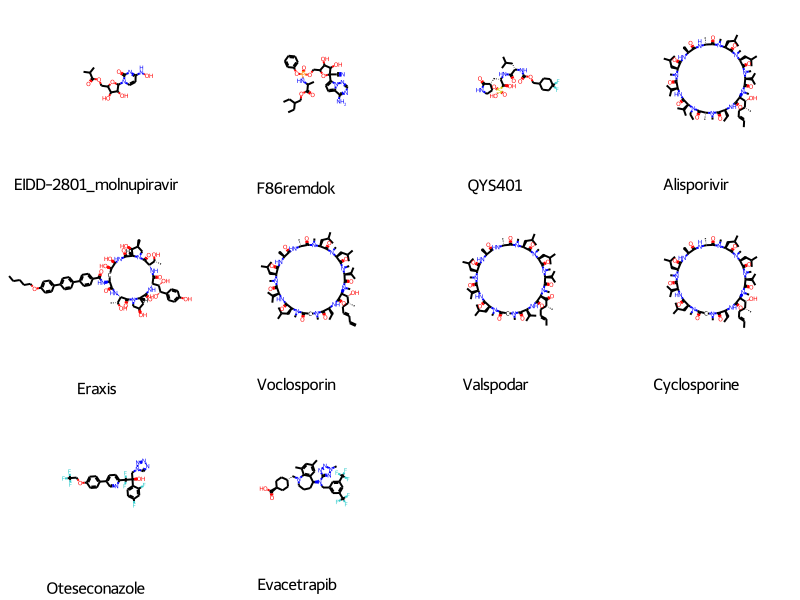

In [ ]:
#Convert SMILES to 2D molecules:
molecules = data_p.Smiles_canonical.apply(Chem.MolFromSmiles)
#Display some of the moecules
Draw.MolsToGridImage(molecules[89:-1],molsPerRow=4,legends=[x for x in data_p.ID[89:-1]]) #legends=[x.GetProp("_Name") for x in ms[:8]]) #

Tanimoto Similarity Coefficient of reference molecule vs refrence molecule: 1.0
Tanimoto Similarity Coefficient of reference molecule vs ramdesivir: 0.19811320754716982
Tanimoto Similarity Coefficient of the new data to predict shows a very divers chemical space with weak TSimilarity; prediction and training data are very divers too


Text(0.5, 1.0, 'Pairwise similarity all molecules')

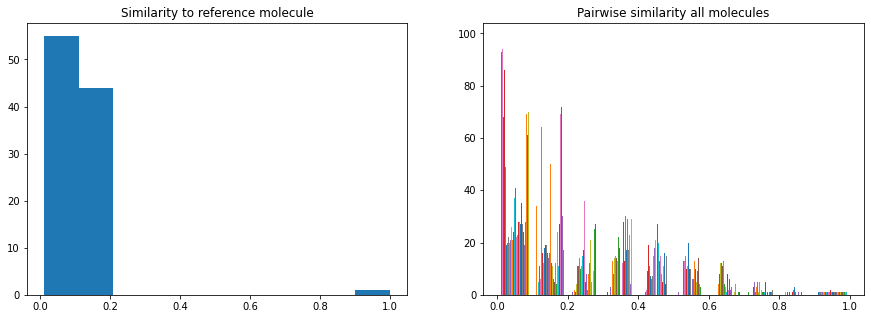

In [ ]:
## Similarity Calculations of the new data to predict

# We calculate Morgan fingerprints 
mols_fps=[AllChem.GetMorganFingerprintAsBitVect(x,2) for x in molecules]
print(f'Tanimoto Similarity Coefficient of reference molecule vs refrence molecule: {DataStructs.TanimotoSimilarity(mols_fps[90],mols_fps[90])}')
print(f'Tanimoto Similarity Coefficient of reference molecule vs ramdesivir: {DataStructs.TanimotoSimilarity(mols_fps[90],mols_fps[89])}')
print(f'Tanimoto Similarity Coefficient of the new data to predict shows a very divers chemical space with weak TSimilarity; prediction and training data are very divers too')

# Calculate similarities to reference molecule
sim_ref = DataStructs.BulkTanimotoSimilarity(mols_fps[90],mols_fps)###reference molecules


# Calculate pairwise similarities
def pairwise_sim(mols):
    pairwise=[]
    for i in mols:
        sim = DataStructs.BulkTanimotoSimilarity(i,mols)
        pairwise.append(sim)
    return pairwise

PW = pairwise_sim(mols_fps)
figure,(plt1,plt2) = plt.subplots(1,2)
figure.set_size_inches(15,5)
plt1.hist(sim_ref)
plt1.set_title('Similarity to reference molecule')
plt2.hist(PW)
plt2.set_title('Pairwise similarity all molecules')

In [ ]:
####################################################molecular features generation for training ########################

In [21]:
##                                                                               generate desriptors_________##################################################""
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule
# GetNumHeavyAtoms() method returns a nubmer of all atoms in a molecule with molecular weight > 1
df=data_t.copy()
#generate descriptors 
#Importing Chem module
#from rdkit import Chem 
#mol = df.Smiles_canonical.apply(Chem.MolFromSmiles)
#Method transforms smiles strings to mol rdkit object
df['mol'] = df['Smiles_canonical'].apply(lambda x: Chem.MolFromSmiles(x)) 
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())
df['Heavy_atom'] = df['mol'].apply(lambda x: Descriptors.HeavyAtomCount(x))
df['LogP'] = df['mol'].apply(lambda x: Descriptors.MolLogP(x))
df['MR'] = df['mol'].apply(lambda x: Descriptors.MolMR(x))
df['Wt'] = df['mol'].apply(lambda x: Descriptors.MolWt(x))
df['Aromatic'] = df['mol'].apply(lambda x: Descriptors.NumAromaticRings(x))
df['H_accep'] = df['mol'].apply(lambda x: Descriptors.NumHAcceptors(x))
df['H_donnor'] = df['mol'].apply(lambda x: Descriptors.NumHDonors(x))
df['TPS'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
df['Max_charge'] = df['mol'].apply(lambda x: Descriptors.MaxAbsPartialCharge(x))
#df['Ipc'] = df['mol'].apply(lambda x: Descriptors.Ipc(x))
df['Kappa1'] = df['mol'].apply(lambda x: Descriptors.Kappa1(x))
df['StateIndex'] = df['mol'].apply(lambda x: Descriptors.MaxAbsEStateIndex(x))
df['Carbocyle'] = df['mol'].apply(lambda x: Descriptors.NumAliphaticCarbocycles(x))
df['Heterocycle'] = df['mol'].apply(lambda x: Descriptors.NumAliphaticHeterocycles(x))
df['Heteroatome'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))
df['RotBonds'] = df['mol'].apply(lambda x: Descriptors.NumRotatableBonds(x))
df['SMR_VSA1'] = df['mol'].apply(lambda x: Descriptors.SMR_VSA1(x))
df['SLogP1'] = df['mol'].apply(lambda x: Descriptors.SlogP_VSA1(x))
df['Al_COO'] = df['mol'].apply(lambda x: Descriptors.fr_Al_COO(x))
df['Al_OH'] = df['mol'].apply(lambda x: Descriptors.fr_Al_OH(x))
df['ArN'] = df['mol'].apply(lambda x: Descriptors.fr_ArN(x))
df['Ar_COO'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_COO(x))
df['Ar_NH'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_NH(x))
df['Ar_OH'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_OH(x))
df['ArN'] = df['mol'].apply(lambda x: Descriptors.fr_ArN(x))
df['COO2'] = df['mol'].apply(lambda x: Descriptors.fr_COO2(x))
df['C_S'] = df['mol'].apply(lambda x: Descriptors.fr_C_S(x))
df['SH'] = df['mol'].apply(lambda x: Descriptors.fr_SH(x))
df['Phenol'] = df['mol'].apply(lambda x: Descriptors.fr_phenol(x))
df['P_acid'] = df['mol'].apply(lambda x: Descriptors.fr_phos_acid(x))
df['Ester'] = df['mol'].apply(lambda x: Descriptors.fr_phos_ester(x))
df['Pyridine'] = df['mol'].apply(lambda x: Descriptors.fr_pyridine(x))
df['Sulfone'] = df['mol'].apply(lambda x: Descriptors.fr_sulfone(x))
df['Morgan1'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan1(x))
df['Morgan2'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan2(x))#important feature
df['Morgan3'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan3(x))
#df['NPR1'] = df['mol'].apply(lambda x: rdMolDescriptors.CalcNPR1(x))
#df['NPR2'] = df['mol'].apply(lambda x: rdMolDescriptors.CalcNPR2(x))
#df['3DNPR1'] = df['mol'].apply(lambda x:Descriptors3D.NPR1(x))
#df['3DNPR2'] = df['mol'].apply(lambda x:Descriptors3D.NPR2(x))
#df['Spherocity'] = df['mol'].apply(lambda x:Descriptors3D.SpherocityIndex(x))
#df['IShape'] = df['mol'].apply(lambda x: rdMolDescriptors.CalcInertialShapeFactor(x))
#df['Rgyration'] = df['mol'].apply(lambda x:Descriptors3D.RadiusOfGyration(x))
#df['Spherocity'] = df['mol'].apply(lambda x:Descriptors3D.SpherocityIndex(x))

In [22]:
df_t=df

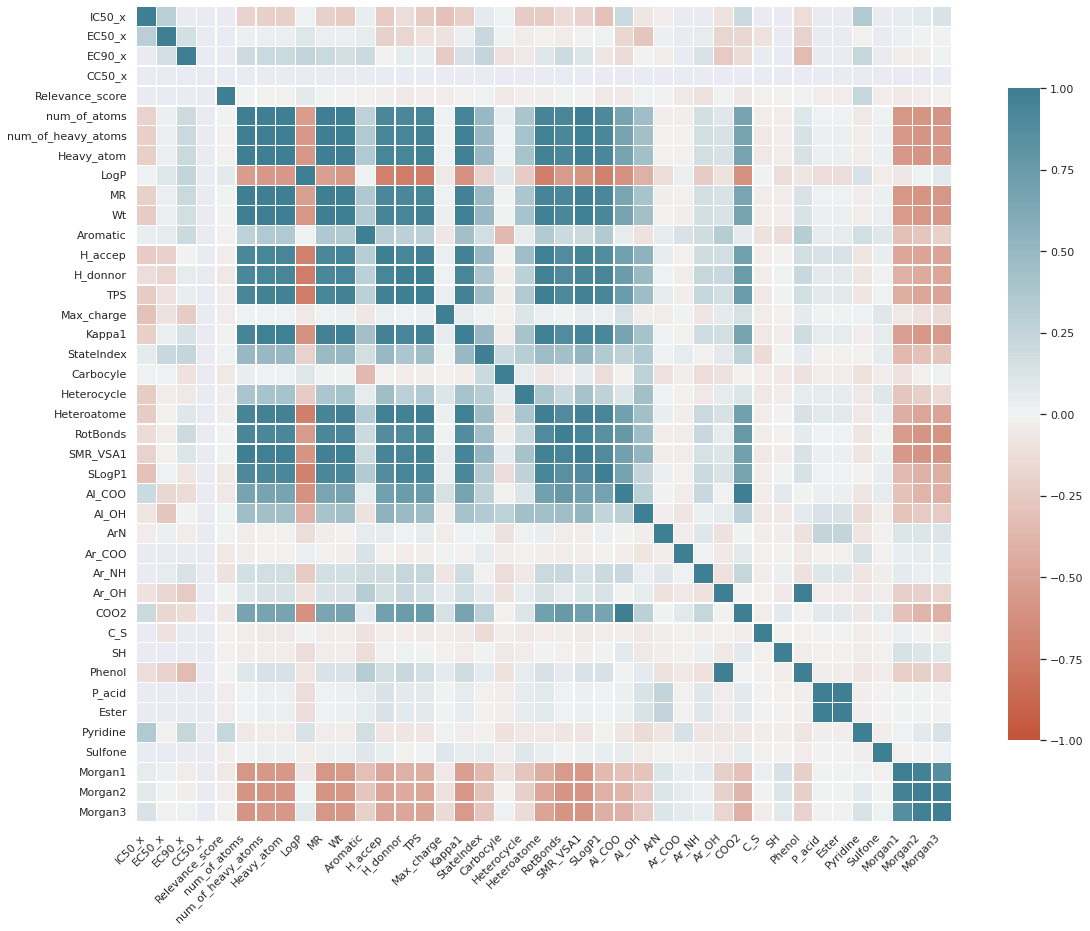

In [ ]:
##################################################   lest see training data linier relationship #####################################
import seaborn as sns
import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(20, 15))
corr_red = df_t.corr()
ax_red = sns.heatmap(
    corr_red,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    #annot=True,
    linewidth=0.3, cbar_kws={"shrink": .8}
)
ax_red.set_xticklabels(
    ax_red.get_xticklabels(), rotation=45, horizontalalignment="right"
);

In [ ]:
###################################################   Generating the same features for the new data for  Prediction #############################

In [17]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                100 non-null    object
 1   Smiles_canonical  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [60]:
##                                                                               generate desriptors_________##################################################""
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule
# GetNumHeavyAtoms() method returns a nubmer of all atoms in a molecule with molecular weight > 1
df=data_p.copy()
#generate descriptors 
#Importing Chem module
#from rdkit import Chem 
#mol = df.Smiles_canonical.apply(Chem.MolFromSmiles)
#Method transforms smiles strings to mol rdkit object
df['mol'] = df['Smiles_canonical'].apply(lambda x: Chem.MolFromSmiles(x)) 
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())
df['Heavy_atom'] = df['mol'].apply(lambda x: Descriptors.HeavyAtomCount(x))
df['LogP'] = df['mol'].apply(lambda x: Descriptors.MolLogP(x))
df['MR'] = df['mol'].apply(lambda x: Descriptors.MolMR(x))
df['Wt'] = df['mol'].apply(lambda x: Descriptors.MolWt(x))
df['Aromatic'] = df['mol'].apply(lambda x: Descriptors.NumAromaticRings(x))
df['H_accep'] = df['mol'].apply(lambda x: Descriptors.NumHAcceptors(x))
df['H_donnor'] = df['mol'].apply(lambda x: Descriptors.NumHDonors(x))
df['TPS'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
df['Max_charge'] = df['mol'].apply(lambda x: Descriptors.MaxAbsPartialCharge(x))
#df['Ipc'] = df['mol'].apply(lambda x: Descriptors.Ipc(x))
df['Kappa1'] = df['mol'].apply(lambda x: Descriptors.Kappa1(x))
df['StateIndex'] = df['mol'].apply(lambda x: Descriptors.MaxAbsEStateIndex(x))
df['Carbocyle'] = df['mol'].apply(lambda x: Descriptors.NumAliphaticCarbocycles(x))
df['Heterocycle'] = df['mol'].apply(lambda x: Descriptors.NumAliphaticHeterocycles(x))
df['Heteroatome'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))
df['RotBonds'] = df['mol'].apply(lambda x: Descriptors.NumRotatableBonds(x))
df['SMR_VSA1'] = df['mol'].apply(lambda x: Descriptors.SMR_VSA1(x))
df['SLogP1'] = df['mol'].apply(lambda x: Descriptors.SlogP_VSA1(x))
df['Al_COO'] = df['mol'].apply(lambda x: Descriptors.fr_Al_COO(x))
df['Al_OH'] = df['mol'].apply(lambda x: Descriptors.fr_Al_OH(x))
df['ArN'] = df['mol'].apply(lambda x: Descriptors.fr_ArN(x))
df['Ar_COO'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_COO(x))
df['Ar_NH'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_NH(x))
df['Ar_OH'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_OH(x))
df['ArN'] = df['mol'].apply(lambda x: Descriptors.fr_ArN(x))
df['COO2'] = df['mol'].apply(lambda x: Descriptors.fr_COO2(x))
df['C_S'] = df['mol'].apply(lambda x: Descriptors.fr_C_S(x))
df['SH'] = df['mol'].apply(lambda x: Descriptors.fr_SH(x))
df['Phenol'] = df['mol'].apply(lambda x: Descriptors.fr_phenol(x))
df['P_acid'] = df['mol'].apply(lambda x: Descriptors.fr_phos_acid(x))
df['Ester'] = df['mol'].apply(lambda x: Descriptors.fr_phos_ester(x))
df['Pyridine'] = df['mol'].apply(lambda x: Descriptors.fr_pyridine(x))
df['Sulfone'] = df['mol'].apply(lambda x: Descriptors.fr_sulfone(x))
df['Morgan1'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan1(x))
df['Morgan2'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan2(x))#important feature
df['Morgan3'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan3(x))
#df['NPR1'] = df['mol'].apply(lambda x: rdMolDescriptors.CalcNPR1(x))
#df['NPR2'] = df['mol'].apply(lambda x: rdMolDescriptors.CalcNPR2(x))
#df['3DNPR1'] = df['mol'].apply(lambda x:Descriptors3D.NPR1(x))
#df['3DNPR2'] = df['mol'].apply(lambda x:Descriptors3D.NPR2(x))
#df['Spherocity'] = df['mol'].apply(lambda x:Descriptors3D.SpherocityIndex(x))
#df['IShape'] = df['mol'].apply(lambda x: rdMolDescriptors.CalcInertialShapeFactor(x))
#df['Rgyration'] = df['mol'].apply(lambda x:Descriptors3D.RadiusOfGyration(x))
#df['Spherocity'] = df['mol'].apply(lambda x:Descriptors3D.SpherocityIndex(x))

In [19]:
df_p=df.copy()

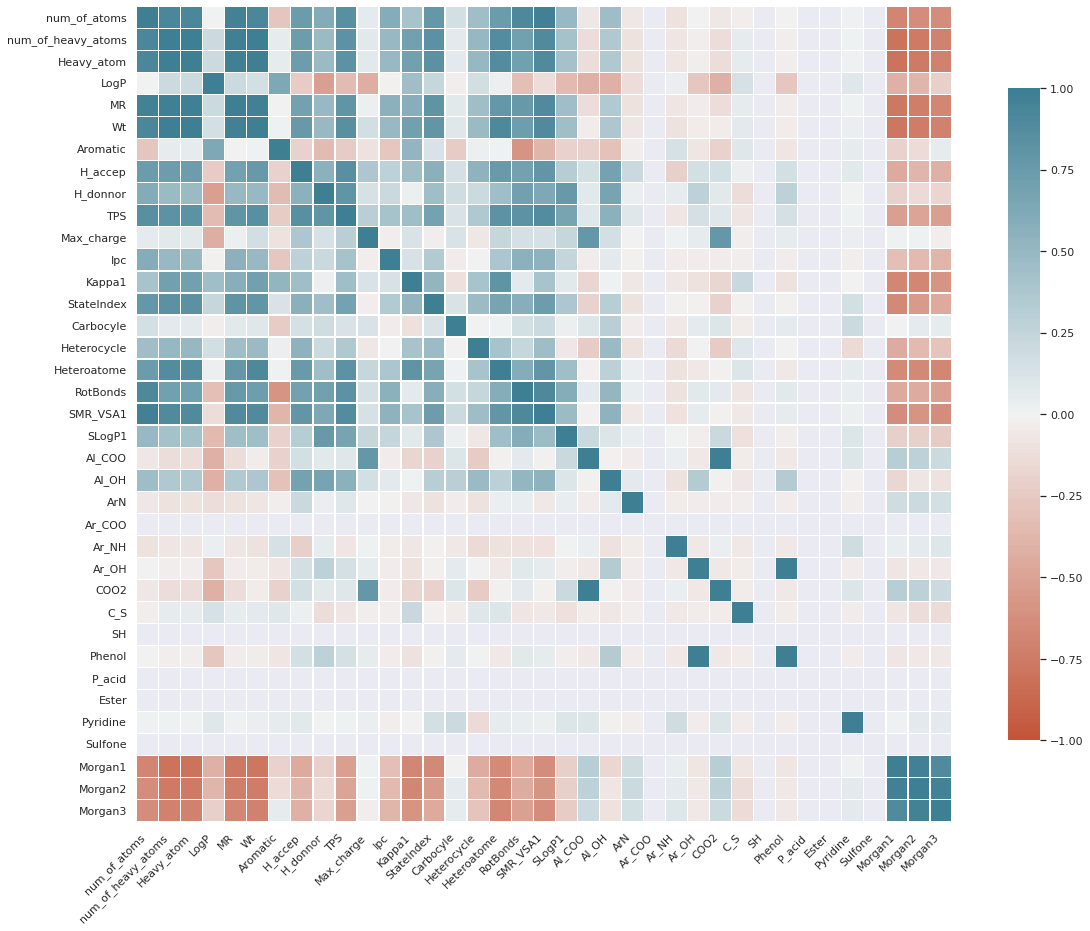

In [ ]:
##################################################   lest see prediction data linier relationship #####################################
import seaborn as sns
import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(20, 15))
corr_red = df_p.corr()
ax_red = sns.heatmap(
    corr_red,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    #annot=True,
    linewidth=0.3, cbar_kws={"shrink": .8}
)
ax_red.set_xticklabels(
    ax_red.get_xticklabels(), rotation=45, horizontalalignment="right"
);

In [ ]:
################################################## prepare the trainig data and selecting target##############

In [23]:
df_t.describe()

,IC50_x,EC50_x,EC90_x,CC50_x,Relevance_score,num_of_atoms,num_of_heavy_atoms,Heavy_atom,LogP,MR,...,C_S,SH,Phenol,P_acid,Ester,Pyridine,Sulfone,Morgan1,Morgan2,Morgan3
count,33.000000,48.000000,33.000000,10.0,216.000000,288.000000,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,6.312545,13.067754,33.643636,40.0,4.352014,65.996528,34.232639,34.232639,2.201786,127.825117,...,0.013889,0.013889,0.409722,0.010417,0.010417,0.097222,0.006944,1.305632,2.067397,2.733940
std,7.291368,14.092427,23.466188,0.0,7.906799,76.679272,38.544667,38.544667,3.919248,137.976650,...,0.143918,0.117234,1.058651,0.131578,0.131578,0.296776,0.083188,0.374134,0.481286,0.562218
min,0.080000,0.002200,0.300000,40.0,0.023000,7.000000,4.000000,4.000000,-26.691980,11.561400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207373,0.433180,0.732719
25%,2.100000,3.285000,15.200000,40.0,0.040000,37.000000,20.000000,20.000000,1.015490,75.274100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060341,1.809524,2.483032
50%,5.470000,8.330000,28.900000,40.0,2.005000,51.000000,27.000000,27.000000,2.521960,101.799550,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.320714,2.123482,2.841875
75%,7.950000,18.335000,42.810000,40.0,4.658000,69.250000,36.250000,36.250000,4.281075,138.300900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.520435,2.381868,3.125000
max,38.580000,53.800000,80.000000,40.0,62.688000,886.000000,454.000000,454.000000,17.853900,1652.390900,...,2.000000,1.000000,8.000000,2.000000,2.000000,1.000000,1.000000,2.428571,3.200000,3.714286


In [ ]:
#################################################### select data for ML #################################

In [24]:
#########################################################################               select 13 most important features   to train #########################
data_tt= df_t.drop(['ID','mol','Smiles_canonical', 'IC50_x','EC50_x', 'EC90_x', 'CC50_x','Activity_EC50', 'Activity_EC90', 'Toxicity','Relevance_score','Activity'], axis=1)# regressors X
data_tt=df_t.loc[:,['TPS','SMR_VSA1','num_of_atoms','Morgan2','H_donnor','num_of_heavy_atoms','Heterocycle','Kappa1','RotBonds','Max_charge','MR','Morgan3','SLogP1','LogP','Morgan1','StateIndex','Activity_IC50']]
data_tt= data_tt[data_tt['Activity_IC50'].notna()]# keep only notna on the target collumn 

In [ ]:
#if needed refit the data according to recall https://www.kaggle.com/kevinarvai/fine-tuning-a-classifier-in-scikit-learn

In [25]:
##############################################      selecting regressors for unseen data to predect later on 
col=data_tt.columns
data_pp=df_p[df_p.columns[df_p.columns.isin(col)]]
print(data_pp.shape,data_tt.shape)##data_pp

(100, 16) (288, 17)


In [ ]:
##################################        _____________________________________________________lest go to the cool stuff:    training    #############################""

In [27]:
data_tt.columns

Index(['TPS', 'SMR_VSA1', 'num_of_atoms', 'Morgan2', 'H_donnor',
       'num_of_heavy_atoms', 'Heterocycle', 'Kappa1', 'RotBonds', 'Max_charge',
       'MR', 'Morgan3', 'SLogP1', 'LogP', 'Morgan1', 'StateIndex',
       'Activity_IC50'],
      dtype='object')

In [28]:
########                                                 select regressors 
y = data_tt.Activity_IC50#################################### target 
X=data_tt.iloc[:,~data_tt.columns.isin(['Activity_IC50'])]#' regressors

In [29]:
#________________________________________________________________________________________________________use SMOLTE to ballance the data :: critical step______________________________________
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy=1)
X_sm, y_sm = smote.fit_resample(X,y)

#plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [ ]:
##########################          imports ##################

In [30]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
#code for classifation
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
########################################################################## y transformation#################

In [31]:
#############################################  binarize Y #########################   very important labels 0:Actve  1: Inactive
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y_sm)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [32]:
######################################################      standardizing X   #####################
from sklearn import preprocessing
r_scaler = preprocessing.RobustScaler()
X= r_scaler.fit_transform(X_sm)
X

array([[ 0.51985293, -0.20679224, -0.57352941, ..., -1.69800992,
         1.11295255, -0.11772653],
       [-0.11472576, -0.48732378, -0.48529412, ..., -0.56805685,
        -0.47408537,  0.03681594],
       [ 1.02669932,  1.41047116,  1.36764706, ...,  0.12401742,
        -0.30127899,  0.65988392],
       ...,
       [-0.39427108, -0.18468634, -0.30882353, ..., -0.4185967 ,
         0.28708708, -0.80977887],
       [ 0.23453313,  1.31139211,  0.33823529, ..., -0.19959635,
        -0.8379327 , -0.09551398],
       [ 0.24644498,  1.39817172,  0.39705882, ..., -0.20473805,
        -0.97485667, -0.11689041]])

In [33]:

###############################################################   Split data between train and test           #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y ,random_state=42)  ##stratify to keep train/test data structure
#############################################################         fine tuning     ##################""

In [34]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)##train=2021 datapoint and test=87 data point

(340, 16) (146, 16) (340, 1) (146, 1)


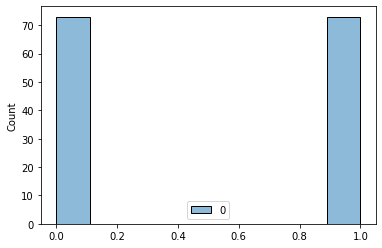

In [35]:
sns.histplot(y_test)##balanced train data ok


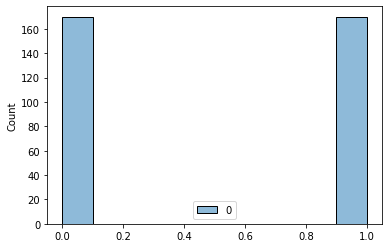

In [36]:
sns.histplot(y_train)## balanced test data ok

In [37]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
##########################################################__________________fine tuning gridsearch and training _________________________#########
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': range(10, 50, 10),
'max_depth': range(3, 12, 2),
'min_samples_leaf': range(1, 7),
'min_samples_split': range(2, 6, 2),
'max_features': ('auto', 'sqrt', 'log2')}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=10, n_jobs=-1, verbose=1)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 40}

In [39]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)##simplyfing feature to 13 did not affect the model accuracy

0.863013698630137

In [40]:
import pickle
pickle.dump(best_clf, open("best_clf.pkl", "wb"))

# load the model
best_clf = pickle.load(open("best_clf.pkl", "rb"))

# use model to predict
#y_pred = best_clf.predict(X_input)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import \
PrecisionRecallDisplay
import seaborn as sns
import matplotlib.pyplot as plt

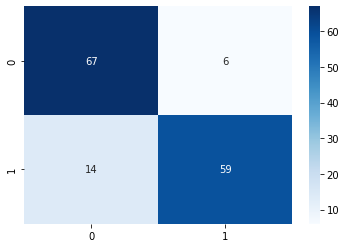

In [42]:
y_pred = best_clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
#from sklearn.metrics import sensitivity
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
import seaborn as sns
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)#, labels='Inactive')
recall = recall_score(y_test, y_pred)
R2=r2_score(y_test, y_pred) ##  poor model  R2= 0.16 , enriched model R2= 0.41 , rerun 0.4, witout morgans =0.5, with mogans =-0.27 , R2=0.45 if scaled##full data -0.2
#Sensitivity=sensitivity(y_test,y_pred)
MSE=mean_squared_error(y_test, y_pred)

In [44]:
R2##better <hen we ballance the data 0.45

0.452054794520548

In [45]:
from sklearn.metrics import classification_report

#classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')


print(classification_report(y_test, y_pred, labels=[0,1]))#target_names=target_names class unballance 

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        73
           1       0.91      0.81      0.86        73

    accuracy                           0.86       146
   macro avg       0.87      0.86      0.86       146
weighted avg       0.87      0.86      0.86       146



In [46]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.863013698630137

In [47]:
print(precision,':precision or +PV,', recall,':recall or sensitivity also true + rate,',R2, ':R2,',MSE,':MSE')###  poor model  R2= 0.16 , enriched model R2= 0.41 , rerun 0.4, witout morgans =0.5, with mogans =-0.27 , R2=0.45 if scaled##full data -0.2


0.9076923076923077 :precision or +PV, 0.8082191780821918 :recall or sensitivity also true + rate, 0.452054794520548 :R2, 0.136986301369863 :MSE


In [48]:
probability = best_clf.predict_proba(X_test)
#probability

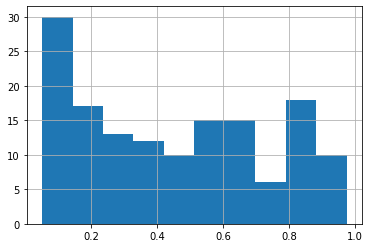

In [49]:
true_probability = probability[:, 1]
pd.Series(true_probability).hist()

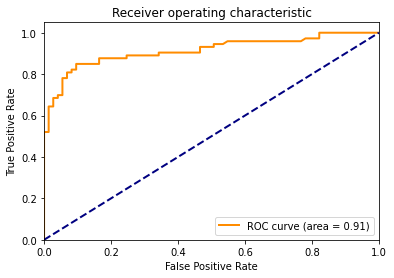

In [50]:
#########___________________________________________________________________________ploting ROC_____________________________________
fpr, tpr, thresholds = roc_curve(y_test, true_probability)
roc_auc= auc(fpr, tpr)
lw=2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:


#def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

# use the same p, r, thresholds that were previously calculated
#plot_precision_recall_vs_threshold(Precision, Recall, thresholds)

In [ ]:
##_________________________________________________________________________for retraining features extraction 
#labels0=data_tt.iloc[:,~data_tt.columns.isin(['Activity_IC50'])]#' regressors
#labels=labels0.columns
#feature_importance = best_clf.feature_importances_
#feature_importance_df = pd.DataFrame({'features': list(labels),'feature_importance': feature_importance})
#feature_importance_df = feature_importance_df.sort_values('feature_importance', ascending="True")
#feature_importance=feature_importance_df.query('feature_importance>0.03')

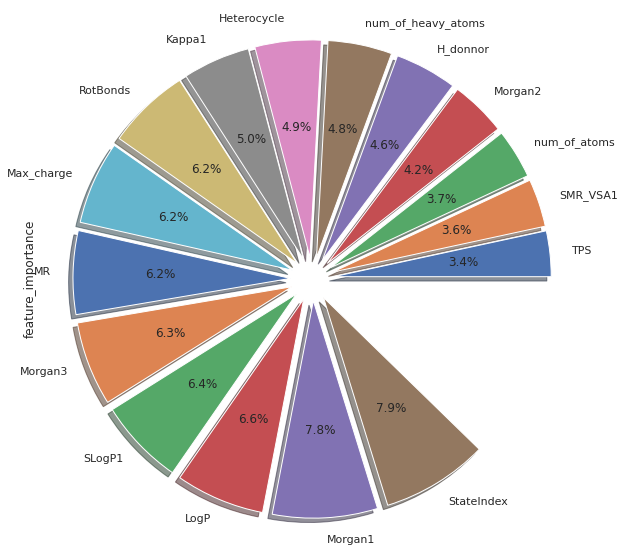

In [ ]:
#feature_importance.plot.pie(
#explode=[0.1]*len(feature_importance.features),
#labels = feature_importance.features,
#y = 'feature_importance',
#autopct='%1.1f%%',
#shadow=True,
#legend=False,
#figsize=(15, 10))

In [ ]:
#############################################         let's run a prediction on a new data =data_pp 

In [55]:
new= {'ID': ['motelukast', 'Levocetirizine'],
    'Smiles_canonical': ['CC(C)(C1=CC=CC=C1CCC(C2=CC=CC(=C2)C=CC3=NC4=C(C=CC(=C4)Cl)C=C3)SCC5(CC5)CC(=O)O)O', 'C1CN(CCN1CCOCC(=O)O)C(C2=CC=CC=C2)C3=CC=C(C=C3)Cl']}

In [56]:
new_data= pd.DataFrame(new)
new_data

,ID,Smiles_canonical
0,motelukast,CC(C)(C1=CC=CC=C1CCC(C2=CC=CC(=C2)C=CC3=NC4=C(...
1,Levocetirizine,C1CN(CCN1CCOCC(=O)O)C(C2=CC=CC=C2)C3=CC=C(C=C3)Cl


In [52]:
data_p.head(2)

,ID,Smiles_canonical
0,CID101616642_Gallicin,CC1C2CCC(=C)C(CCC(=CC2OC1=O)C)O
1,CID10207_Aloeimodin,C1=CC2=C(C(=C1)O)C(=O)C3=C(C2=O)C=C(C=C3O)CO


In [93]:
data_p=data_p.append(new_data, ignore_index=True)

In [94]:
data_p.tail(2)

,ID,Smiles_canonical,mol,num_of_atoms,num_of_heavy_atoms,Heavy_atom,LogP,MR,Wt,Aromatic,...,C_S,SH,Phenol,P_acid,Ester,Pyridine,Sulfone,Morgan1,Morgan2,Morgan3
100,motelukast,CC(C)(C1=CC=CC=C1CCC(C2=CC=CC(=C2)C=CC3=NC4=C(...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Levocetirizine,C1CN(CCN1CCOCC(=O)O)C(C2=CC=CC=C2)C3=CC=C(C=C3)Cl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#                                                                               generate desriptors_________##################################################""
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule
# GetNumHeavyAtoms() method returns a nubmer of all atoms in a molecule with molecular weight > 1
df=data_p.copy()
#generate descriptors 
#Importing Chem module
#from rdkit import Chem 
#mol = df.Smiles_canonical.apply(Chem.MolFromSmiles)
#Method transforms smiles strings to mol rdkit object
df['mol'] = df['Smiles_canonical'].apply(lambda x: Chem.MolFromSmiles(x)) 
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())
df['Heavy_atom'] = df['mol'].apply(lambda x: Descriptors.HeavyAtomCount(x))
df['LogP'] = df['mol'].apply(lambda x: Descriptors.MolLogP(x))
df['MR'] = df['mol'].apply(lambda x: Descriptors.MolMR(x))
df['Wt'] = df['mol'].apply(lambda x: Descriptors.MolWt(x))
df['Aromatic'] = df['mol'].apply(lambda x: Descriptors.NumAromaticRings(x))
df['H_accep'] = df['mol'].apply(lambda x: Descriptors.NumHAcceptors(x))
df['H_donnor'] = df['mol'].apply(lambda x: Descriptors.NumHDonors(x))
df['TPS'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
df['Max_charge'] = df['mol'].apply(lambda x: Descriptors.MaxAbsPartialCharge(x))
#df['Ipc'] = df['mol'].apply(lambda x: Descriptors.Ipc(x))
df['Kappa1'] = df['mol'].apply(lambda x: Descriptors.Kappa1(x))
df['StateIndex'] = df['mol'].apply(lambda x: Descriptors.MaxAbsEStateIndex(x))
df['Carbocyle'] = df['mol'].apply(lambda x: Descriptors.NumAliphaticCarbocycles(x))
df['Heterocycle'] = df['mol'].apply(lambda x: Descriptors.NumAliphaticHeterocycles(x))
df['Heteroatome'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))
df['RotBonds'] = df['mol'].apply(lambda x: Descriptors.NumRotatableBonds(x))
df['SMR_VSA1'] = df['mol'].apply(lambda x: Descriptors.SMR_VSA1(x))
df['SLogP1'] = df['mol'].apply(lambda x: Descriptors.SlogP_VSA1(x))
df['Al_COO'] = df['mol'].apply(lambda x: Descriptors.fr_Al_COO(x))
df['Al_OH'] = df['mol'].apply(lambda x: Descriptors.fr_Al_OH(x))
df['ArN'] = df['mol'].apply(lambda x: Descriptors.fr_ArN(x))
df['Ar_COO'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_COO(x))
df['Ar_NH'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_NH(x))
df['Ar_OH'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_OH(x))
df['ArN'] = df['mol'].apply(lambda x: Descriptors.fr_ArN(x))
df['COO2'] = df['mol'].apply(lambda x: Descriptors.fr_COO2(x))
df['C_S'] = df['mol'].apply(lambda x: Descriptors.fr_C_S(x))
df['SH'] = df['mol'].apply(lambda x: Descriptors.fr_SH(x))
df['Phenol'] = df['mol'].apply(lambda x: Descriptors.fr_phenol(x))
df['P_acid'] = df['mol'].apply(lambda x: Descriptors.fr_phos_acid(x))
df['Ester'] = df['mol'].apply(lambda x: Descriptors.fr_phos_ester(x))
df['Pyridine'] = df['mol'].apply(lambda x: Descriptors.fr_pyridine(x))
df['Sulfone'] = df['mol'].apply(lambda x: Descriptors.fr_sulfone(x))
df['Morgan1'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan1(x))
df['Morgan2'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan2(x))#important feature
df['Morgan3'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan3(x))
#df['NPR1'] = df['mol'].apply(lambda x: rdMolDescriptors.CalcNPR1(x))
#df['NPR2'] = df['mol'].apply(lambda x: rdMolDescriptors.CalcNPR2(x))
#df['3DNPR1'] = df['mol'].apply(lambda x:Descriptors3D.NPR1(x))
#df['3DNPR2'] = df['mol'].apply(lambda x:Descriptors3D.NPR2(x))
#df['Spherocity'] = df['mol'].apply(lambda x:Descriptors3D.SpherocityIndex(x))
#df['IShape'] = df['mol'].apply(lambda x: rdMolDescriptors.CalcInertialShapeFactor(x))
#df['Rgyration'] = df['mol'].apply(lambda x:Descriptors3D.RadiusOfGyration(x))
#df['Spherocity'] = df['mol'].apply(lambda x:Descriptors3D.SpherocityIndex(x))

In [96]:
data_p=df.copy()

In [97]:
col=data_tt.columns
data_pp=data_p[data_p.columns[data_p.columns.isin(col)]]
print(data_pp.shape,data_tt.shape)##data_pp

(102, 16) (288, 17)


In [98]:
#___________________________________________________________________________  scale new  X_______________________________________
from sklearn import preprocessing
r_scaler = preprocessing.RobustScaler()
data_r_pp= r_scaler.fit_transform(data_pp)
data_r_pp.round(decimals=0)

array([[-1., -2., -1., ...,  3.,  3.,  2.],
       [-2., -2., -1., ..., -0.,  0.,  0.],
       [-3., -4., -1., ...,  2.,  1., -1.],
       ...,
       [ 4.,  3.,  1., ...,  1.,  1.,  1.],
       [ 2.,  1.,  3., ...,  1.,  1.,  1.],
       [-0., -1., -1., ...,  1.,  0.,  0.]])

In [99]:
print(X_test.shape,data_pp.shape)

(146, 16) (102, 16)


In [100]:
y_pr_scaled=best_clf.predict(data_pp)#sensitivity too low 
y_pr_scaled

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [101]:
results=pd.DataFrame(y_pr_scaled,index=data_p.ID, columns=['Activity'])

In [103]:
results.reset_index()

,ID,Activity
0,CID101616642_Gallicin,1
1,CID10207_Aloeimodin,1
2,CID11617_AllylDisulfide,1
3,CID11617_Allylsulfide,0
4,CID11617_AllylTsulfide,1
...,...,...
97,Oteseconazole,1
98,Evacetrapib,1
99,Faldaprevir,1
100,motelukast,1


In [104]:
results.to_csv('molecule_prediction_covid.csv', sep=";",decimal=".",header="True")

In [ ]:
y_pr_scaled=best_clf.predict(data_pp)#sensitivity too low 
y_pr_scaled

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
y_pr_scaled

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_pr_scaled=rf_model_st.predict(data_r_pp)##scaled full
print(y_pr_scaled)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
y_pr_scaled=rf_model_scaled.predict(data_r_pp)
print(y_pr_scaled)

[1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0]


In [ ]:
y_pr_not_scaled=rf_model_scaled.predict(data_pp)
print(y_pr_not_scaled,"witout scaling")

[1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0] witout scaling


In [ ]:
y_pr_scaled=rf_model_st.predict(data_r_pp)
print(y_pr_scaled)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0]


In [ ]:
y_pr_not_scaled=rf_model.predict(data_pp)
print(y_pr_not_scaled,"witout scaling")

[1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0] witout scaling


In [ ]:
df_p.ID

0       CID101616642_Gallicin
1         CID10207_Aloeimodin
2     CID11617_AllylDisulfide
3       CID11617_Allylsulfide
4      CID11617_AllylTsulfide
               ...           
95                  Valspodar
96               Cyclosporine
97              Oteseconazole
98                Evacetrapib
99                Faldaprevir
Name: ID, Length: 100, dtype: object

In [ ]:
y_pred_scaled = pd.DataFrame(y_pr_scaled, columns = ['y_scaled'],index=df_p.ID)
y_pred = pd.DataFrame(y_pr_not_scaled, columns = ['y_not_scaled'],index=df_p.ID)
predictions=y_pred_scaled.join(y_pred, how="right")
predictions['mixed_predicton']=predictions.y_scaled+predictions.y_not_scaled
results2=predictions[predictions['mixed_predicton']==0]
results2.index

Index(['mol101', 'F86remdok', 'Eraxis', 'Faldaprevir'], dtype='object', name='ID')

In [ ]:
results2=predictions[predictions['mixed_predicton']==0]
results2

,y_scaled,y_not_scaled,mixed_predicton
ID,,,
mol101,0,0,0
F86remdok,0,0,0
Eraxis,0,0,0
Faldaprevir,0,0,0


In [ ]:
results2=predictions[predictions['mixed_predicton']==0]
results2

,y_scaled,y_not_scaled,mixed_predicton
ID,,,
CID10207_Aloeimodin,0,0,0
CID22145_Chapso,0,0,0
CID5281544_Oleuropein,0,0,0
Mol24,0,0,0
EIDD-2801_molnupiravir,0,0,0
F86remdok,0,0,0
QYS401,0,0,0
Faldaprevir,0,0,0


In [ ]:
results.index

Index(['CID10207_Aloeimodin', 'CID22145_Chapso', 'CID5281544_Oleuropein',
       'Mol24', 'EIDD-2801_molnupiravir', 'F86remdok', 'QYS401',
       'Faldaprevir'],
      dtype='object', name='ID')

In [ ]:
#############################   model evaluation using yellobrick  #######################

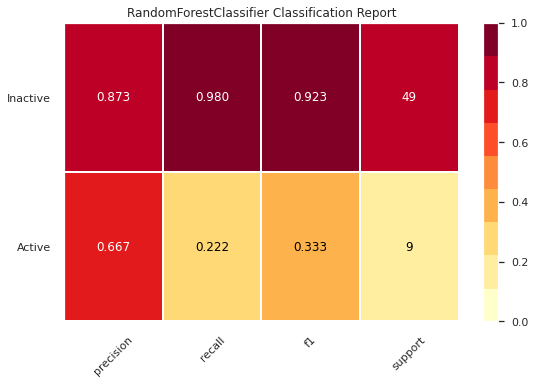

-0.05215419501133778


In [ ]:
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.classifier import ClassificationReport
from yellowbrick.cluster import InterclusterDistance
from sklearn.model_selection import TimeSeriesSplit

# Generate synthetic dataset with 12 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)
# Instantiate the clustering model and visualizer
classes=['Active','Inactive']
model = rf_model_st#RandomForestClassifier(criterion='entropy', n_estimators=200)
visualizer = ClassificationReport(model, support=True, classes=classes)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure
y_pr=model.predict(X_test)
print(r2_score(y_test, y_pr))###  poor model  R2= 0.16 , enriched model R2= 0.41 , rerun 0.4
#print(mean_squared_error(y_test, y_pred))

In [ ]:
y_pr_new=model.predict(data_r_pp)
print(y_pr_new)

[1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


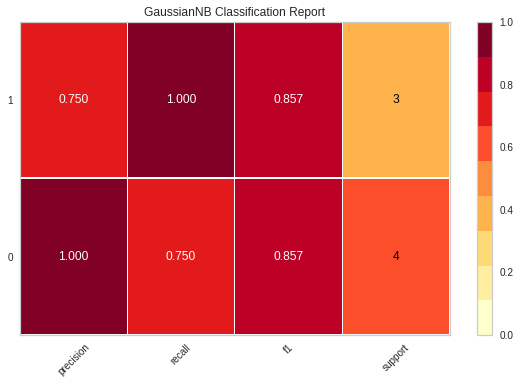

R2= 0.4166666666666665
Predicting data_r_pp [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1]


In [ ]:
from sklearn.naive_bayes import GaussianNB
# Instantiate the classification model and visualizer
G_model = GaussianNB()
visualizer = ClassificationReport(G_model, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure
y_pr_new=G_model.predict(data_r_pp)
y_pr=G_model.predict(X_test)
print('R2=',r2_score(y_test, y_pr))
print('Predicting data_r_pp',y_pr_new)
#print(mean_squared_error(y_test, y_pred))

In [ ]:
######################

In [ ]:
col2=data_tt.columns

In [ ]:
from yellowbrick.target import class_balance

# Use the quick method and immediately show the figure
class_balance(y)

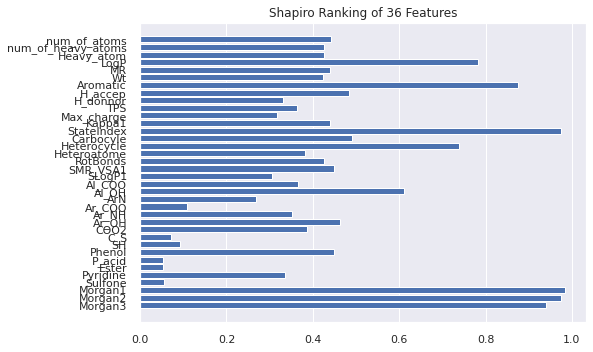

Index(['Activity_IC50', 'num_of_atoms', 'num_of_heavy_atoms', 'Heavy_atom',
       'LogP', 'MR', 'Wt', 'Aromatic', 'H_accep', 'H_donnor', 'TPS',
       'Max_charge', 'Kappa1', 'StateIndex', 'Carbocyle', 'Heterocycle',
       'Heteroatome', 'RotBonds', 'SMR_VSA1', 'SLogP1', 'Al_COO', 'Al_OH',
       'ArN', 'Ar_COO', 'Ar_NH', 'Ar_OH', 'COO2', 'C_S', 'SH', 'Phenol',
       'P_acid', 'Ester', 'Pyridine', 'Sulfone', 'Morgan1', 'Morgan2',
       'Morgan3'],
      dtype='object')


In [ ]:
from sklearn.utils.validation import column_or_1d
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure
print(data_tt.columns)